In [1]:
from random_stock_price_generator import RandomStockPrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [2]:
rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', years=20)
returns = rp.returns
prices = rp.prices

In [3]:
prices.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1996-01-01,33.068624,11.764047,87.236860,200.603152,92.443395,56.896832,9.393021,100.845514,37.084451,46.375717,...,33.257483,93.114342,16.678453,43.146403,39.338217,24.677587,13.547302,52.055440,101.419611,39.428005
1996-01-02,32.773105,11.831440,85.843883,205.490549,94.663741,56.298498,9.530435,100.341627,37.156093,45.822349,...,33.317726,93.914303,16.566208,43.258818,39.218453,24.739651,13.429056,51.818464,100.405362,38.736831
1996-01-03,32.270982,11.580571,87.101540,206.829029,95.336852,56.770039,9.415714,101.529504,36.392804,46.549917,...,33.072448,92.582545,16.735780,42.539017,39.196404,24.416690,13.602921,51.894674,102.753430,37.844803
1996-01-04,31.916839,11.470941,87.502201,210.081487,93.695255,57.619695,9.299625,100.665794,37.187763,47.018609,...,32.609126,91.599421,16.857017,42.409771,39.090925,24.514326,13.281340,52.138325,101.827381,38.005425
1996-01-05,31.667222,11.506328,85.905488,206.035189,92.879157,57.851750,9.356674,100.501988,36.676513,47.292649,...,32.836922,90.885457,17.029365,42.611550,38.816019,24.606040,13.163050,52.299315,102.447395,37.942640


## Taking a look at the first price path for daily returns

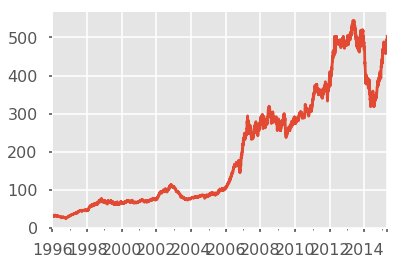

In [4]:
ticker = 'TICK0'
prices[ticker].plot()

In [5]:
def resample_prices(prices, freq='M'):
    '''
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    '''
    return prices.resample(freq).last()

## Resampling to monthly returns

In [6]:
resampled = resample_prices(prices)
resampled.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1996-01-31,29.888064,11.206430,86.043945,225.316629,89.915915,64.648140,9.314084,102.680989,36.047491,47.573982,...,34.452495,88.230614,16.768739,40.715872,37.049193,22.430465,13.116647,52.441042,97.038867,37.089669
1996-02-29,33.147035,10.502874,84.646176,211.732769,89.290360,61.978830,8.553012,103.244463,38.357591,45.995095,...,34.599394,84.690146,16.103249,37.711345,36.082012,22.356539,12.663045,53.530294,101.657350,36.418825
1996-03-31,31.275619,9.847891,91.225533,228.994304,104.597573,60.282759,8.533606,101.256290,37.243488,43.987717,...,35.296369,84.013657,15.368500,38.261154,34.420348,21.821958,12.511153,54.854923,105.168920,38.482080
1996-04-30,30.840426,9.775880,94.177300,230.513196,96.964970,57.067834,8.028697,97.285439,37.581612,43.600041,...,33.082835,79.321041,14.063315,37.831854,33.943819,22.056302,11.581093,55.525637,103.793622,36.200974
1996-05-31,29.485869,9.908023,93.424096,233.286417,99.038608,56.641465,7.497932,95.290521,36.052563,41.424737,...,33.199197,83.157250,12.591854,37.604327,35.216452,22.302904,10.460879,55.867188,89.793729,35.831479


## Taking a second look at the first stock with monthly and daily returns

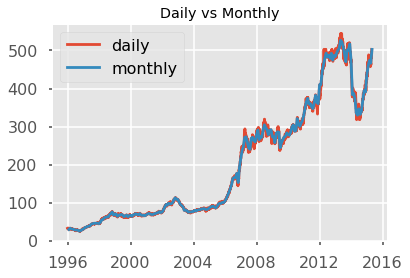

In [7]:
plt.plot(prices.loc[:,ticker])
plt.plot(resampled.loc[:,ticker])
plt.title('Daily vs Monthly')
plt.legend(['daily', 'monthly'])

In [8]:
def compute_log_returns(prices, periods=1):
    '''
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    '''
    shifted = prices.shift(periods)
    return np.log(prices/shifted).dropna()

In [9]:
log_returns = compute_log_returns(resampled)
log_returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1996-02-29,0.103494,-0.064839,-0.016378,-0.062182,-0.006981,-0.042166,-0.085244,0.005473,0.062115,-0.033751,...,0.004255,-0.040955,-0.040495,-0.076657,-0.026452,-0.003301,-0.035194,0.020558,0.046496,-0.018253
1996-03-31,-0.058114,-0.064392,0.074855,0.078372,0.158227,-0.027747,-0.002271,-0.019445,-0.029475,-0.044624,...,0.019944,-0.008020,-0.046701,0.014474,-0.047147,-0.024202,-0.012067,0.024444,0.033960,0.055107
1996-04-30,-0.014012,-0.007339,0.031844,0.006611,-0.075771,-0.054806,-0.060990,-0.040006,0.009038,-0.008852,...,-0.064766,-0.057476,-0.088750,-0.011284,-0.013941,0.010682,-0.077247,0.012153,-0.013163,-0.061107
1996-05-31,-0.044915,0.013427,-0.008030,0.011959,0.021160,-0.007499,-0.068395,-0.020719,-0.041537,-0.051180,...,0.003511,0.047230,-0.110520,-0.006032,0.036807,0.011119,-0.101731,0.006132,-0.144889,-0.010259
1996-06-30,-0.037038,-0.015537,-0.147425,0.020577,0.018232,0.025267,-0.053504,-0.033272,-0.042339,-0.008449,...,-0.009791,0.011429,-0.083090,-0.043347,-0.001854,-0.074919,0.020286,-0.012303,-0.114209,-0.056484


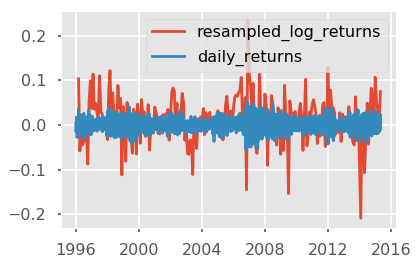

In [10]:
plt.plot(log_returns.loc[:, ticker])
plt.plot(returns.loc[:, ticker])
plt.legend(['resampled_log_returns', 'daily_returns'])

## Previous and Lookahead returns

In [11]:
previous_returns = compute_log_returns(resampled, 1).shift(1).dropna()
lookahead_returns = log_returns.shift(-1).dropna()

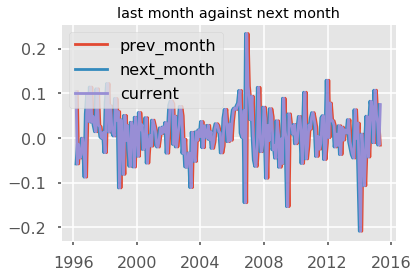

In [12]:
plt.plot(previous_returns.loc[:, ticker])
plt.plot(lookahead_returns.loc[:, ticker])
plt.plot(log_returns.loc[:, ticker])
plt.title('last month against next month')
plt.legend(['prev_month', 'next_month', 'current'])

## Generate Trading Signal
We will use previous returns to determine which stocks to buy and which to sell

In [13]:
def get_top_n(prev_returns, top_n):
    '''
    Select the top performing stocks.
    
    Parameters
    ----------
    prev_returns: pd.DataFrame
        previous shifted returns for each ticker and date
    top_n: int
        The number of top performing stocks to get
        
    Returns
    -------
    top_stocks: pd.DataFrame
        Top <top_n> stocks for each day marked with a 1
    '''
    top_stocks = prev_returns.copy()
    for index, row in prev_returns.iterrows():
        top_returns = row.nlargest(top_n).index
        # set all to zero
        top_stocks.loc[index] = 0
        
        for x in top_returns:
            top_stocks.at[index, x] = 1

    return top_stocks.astype('int64')

Text(0.5, 1.0, 'Most Shorted Stocks')

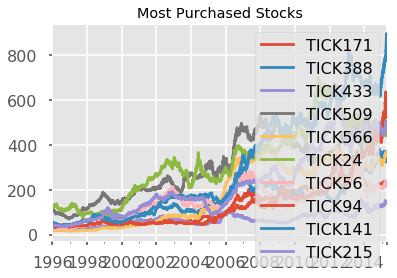

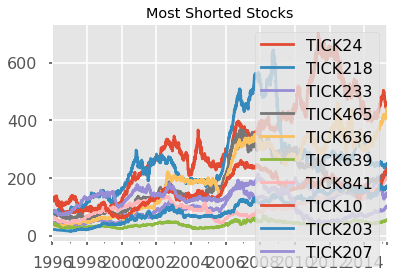

In [14]:
n_stocks = 1
long_stocks = get_top_n(previous_returns, n_stocks)
short_stocks = get_top_n(-1*previous_returns, n_stocks)

top_tickers = long_stocks.sum().nlargest(10)  
worst_tickers = short_stocks.sum().nlargest(10)
prices[top_tickers.index].plot()
plt.title('Most Purchased Stocks')
prices[worst_tickers.index].plot()
plt.title('Most Shorted Stocks')

## Checking results

In [15]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    '''
    Compute expected returns for the portfolio assuming equal investment in each long/short stock
    
    Parameters
    ----------
    df_long: pd.DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short: pd.DataFrame
        Worst stocks for each ticker and date marked with a 1
    lookahead_returns: pd.DataFrame
        contains returns for the next period on the current day
    n_stocks: int
        The number of stocks chosen for each month
        
    Returns
    -------
    portfolio_returns: pd.DataFrame
        Expected portfolio returns for each ticker and date
    '''
    
    longs = df_long * lookahead_returns
    shorts = df_short * -lookahead_returns
    result = (longs + shorts).dropna()
    return result/n_stocks

Text(0.5, 1.0, 'Total returns each day')

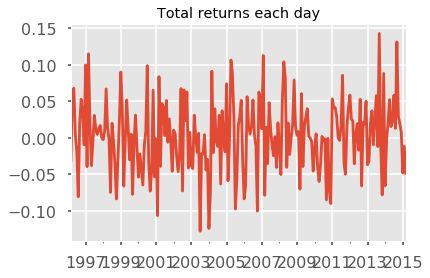

In [16]:
port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
port_returns.T.sum().dropna().plot()
plt.title('Total returns each day')

## Statistical Tests

In [17]:
expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
expected_portfolio_returns_by_date.head()

1996-03-31   -0.031170
1996-04-30    0.063136
1996-05-31    0.068178
1996-06-30    0.004763
1996-07-31   -0.017112
Freq: M, dtype: float64

In [18]:
portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
print('''
Mean Daily Return:     {:.6f}
Standard Error:        {:.6f}
Annual Rate of Return: {:.2f}%
'''.format(portfolio_mean_ret, portfolio_ste_ret, annualized_mean_return))


Mean Daily Return:     0.002404
Standard Error:        0.003220
Annual Rate of Return: 2.93%



### T-Test
My null hypothesis ($H_0$) is that the actual mean return from the signal is zero. I'll perform a one-sample, one-sided t-test on the observed mean return, to see if I can reject $H_0$.

I'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, I'll use $\alpha = 0.05$, since it's a common value to use.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so I'll divide the p-value by 2 to get 1-sided p-value

In [19]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    '''
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date: pd.DataFrame
        Expected portfolio returns by date
        
    Returns
    -------
    t_value: float
        T-statistic from the t-test
    p_value: float
        Corresponding p-value
    '''
    
    t, p = stats.ttest_1samp(expected_portfolio_returns_by_date, 0.0)
    return t, p/2

In [20]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print('''
Alpha analysis:
    t-value:     {:.3f}
    p-value:     {:.3f}
'''.format(t_value, p_value))


Alpha analysis:
    t-value:     0.747
    p-value:     0.228



## Results
The returns and p-values are not impressive and show there is no alpha here. Using the RandomStockPrices generator with a default mean of 0.05 and default standard deviation of all of the underlying distributions being from 0.10 to 0.50.

Next I will put all of the above into one function, where I can tweak the random price distributions and lower the standard deviation range from (0.10, 0.50) to (0.01, 0.05). This should produce better results.

In [21]:
def momentum_test(n_stocks=10, samples=10, const_dist=False):
    '''
    Function to combine all of the above and where we can manipulate the underlying stock distributions and 
    prints the results after running <samples> simulations
    
    Parameters
    ----------
    stock_universe_dist_mean: float
        the mean of all of the stock return distributions' means
    n_stocks: int
        the number of stocks to buy(sell) each period
    freq: string
        frequency of rebalancing
        
    Returns
    -------
    None
    '''
    port_daily_returns_mean = []
    port_daily_standard_error = []
    port_annual_return = []
    t_values = []
    p_values = []
    
    for i in range(samples):
        rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', years=20, constant_dist=const_dist)
        prices = rp.prices
        resampled_returns = resample_prices(prices, freq='M')
        log_returns = compute_log_returns(resampled_returns)
        previous_returns = log_returns.shift(1).dropna()
        lookahead_returns = log_returns.shift(-1).dropna()
        long_stocks = get_top_n(previous_returns, n_stocks)
        short_stocks = get_top_n(-1*previous_returns, n_stocks)
        port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
        expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
        portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
        portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
        annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
        t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
        port_daily_returns_mean.append(portfolio_mean_ret)
        port_daily_standard_error.append(portfolio_ste_ret)
        port_annual_return.append(annualized_mean_return)
        t_values.append(t_value)
        p_values.append(p_value)
    print('''
    Mean Daily Return:     {:.6f}
    Standard Error:        {:.6f}
    Annual Rate of Return: {:.2f}%
    '''.format(np.mean(port_daily_returns_mean), np.mean(port_daily_standard_error), np.mean(port_annual_return)))

    print('''
    Alpha analysis:
        t-value:     {:.3f}
        p-value:     {:.3f}
    '''.format(np.mean(t_values), np.mean(p_value)))

In [22]:
# First test, the usual parameters
momentum_test(n_stocks=10, samples=1)


    Mean Daily Return:     0.000469
    Standard Error:        0.001016
    Annual Rate of Return: 0.56%
    

    Alpha analysis:
        t-value:     0.462
        p-value:     0.322
    


In [23]:
momentum_test(n_stocks=10, samples=1, const_dist=True)


    Mean Daily Return:     0.003808
    Standard Error:        0.001033
    Annual Rate of Return: 4.68%
    

    Alpha analysis:
        t-value:     3.687
        p-value:     0.000
    


In [24]:
# using a constant distribution
momentum_test(n_stocks=500, samples=10, const_dist=True)


    Mean Daily Return:     0.001314
    Standard Error:        0.000104
    Annual Rate of Return: 1.59%
    

    Alpha analysis:
        t-value:     12.615
        p-value:     0.000
    


In [25]:
# using a non-constant distribution for the returns
momentum_test(n_stocks=500, samples=10)


    Mean Daily Return:     0.000288
    Standard Error:        0.000104
    Annual Rate of Return: 0.35%
    

    Alpha analysis:
        t-value:     2.782
        p-value:     0.004
    


## Modification to make it use more historical data

In [26]:
def momentum_test(n_stocks=10, periods_lookback=1, samples=10, const_dist=False):
    '''
    Function to combine all of the above and where we can manipulate the underlying stock distributions and 
    prints the results after running <samples> simulations
    
    Parameters
    ----------
    stock_universe_dist_mean: float
        the mean of all of the stock return distributions' means
    n_stocks: int
        the number of stocks to buy(sell) each period
    freq: string
        frequency of rebalancing
        
    Returns
    -------
    None
    '''
    port_daily_returns_mean = []
    port_daily_standard_error = []
    port_annual_return = []
    t_values = []
    p_values = []
    
    for i in range(samples):
        rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', years=20, constant_dist=const_dist)
        prices = rp.prices
        resampled_prices = resample_prices(prices, freq='M')
        log_returns = compute_log_returns(resampled_prices)
        previous_returns = compute_log_returns(resampled_prices, periods_lookback).shift(1).dropna()
        lookahead_returns = log_returns.shift(-1)
        long_stocks = get_top_n(previous_returns, n_stocks)
        short_stocks = get_top_n(-1*previous_returns, n_stocks)
        port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
        expected_portfolio_returns_by_date = port_returns.sum(axis=1)
        portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
        portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
        annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
        t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
        port_daily_returns_mean.append(portfolio_mean_ret)
        port_daily_standard_error.append(portfolio_ste_ret)
        port_annual_return.append(annualized_mean_return)
        t_values.append(t_value)
        p_values.append(p_value)
    print('''
    Mean Daily Return:     {:.6f}
    Standard Error:        {:.6f}
    Annual Rate of Return: {:.2f}%
    '''.format(np.mean(port_daily_returns_mean), np.mean(port_daily_standard_error), np.mean(port_annual_return)))

    print('''
    Alpha analysis:
        t-value:     {:.3f}
        p-value:     {:.3f}
    '''.format(np.mean(t_values), np.mean(p_value)))

In [27]:
momentum_test(n_stocks=500, periods_lookback=3, samples=10, const_dist=True)


    Mean Daily Return:     0.002245
    Standard Error:        0.000102
    Annual Rate of Return: 2.73%
    

    Alpha analysis:
        t-value:     22.098
        p-value:     0.000
    


In [28]:
momentum_test(n_stocks=500, periods_lookback=3, samples=10)


    Mean Daily Return:     0.000523
    Standard Error:        0.000104
    Annual Rate of Return: 0.63%
    

    Alpha analysis:
        t-value:     5.038
        p-value:     0.000
    


In [29]:
momentum_test(n_stocks=500, periods_lookback=60, samples=10, const_dist=True)


    Mean Daily Return:     0.005771
    Standard Error:        0.000122
    Annual Rate of Return: 7.17%
    

    Alpha analysis:
        t-value:     47.493
        p-value:     0.000
    


In [30]:
momentum_test(n_stocks=500, periods_lookback=60, samples=10)


    Mean Daily Return:     0.000185
    Standard Error:        0.000120
    Annual Rate of Return: 0.22%
    

    Alpha analysis:
        t-value:     1.548
        p-value:     0.280
    
